In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
train_df = pd.read_csv('../../datasets/training_2nd_dataset.csv')
train_df.head()

,date_sequence,hour_sequence,domain_name,prov,isp,node_name,avg_fbt_time,synack1_ratio,reset_ratio,tcp_conntime,...,inner_network_droprate,inner_network_rtt,cpu_util,mem_util,io_await_avg,io_await_max,io_util_avg,io_util_max,ng_traf_level,buffer_rate
0,1,4,domain_4,prov_2,isp_11,node_512,9,0.977783,0.057003,73,...,0.01826,0,0.04032,0.62174,11,16,0.01678,0.0215,0.0,0.027413
1,1,4,domain_4,prov_2,isp_11,node_267,6,0.981447,0.055372,73,...,0.02938,0,0.06964,0.48950,2,2,0.02708,0.0285,0.0,0.015271
2,1,4,domain_4,prov_1,isp_11,node_241,7,0.958187,0.050343,94,...,0.02100,0,0.04388,0.60738,14,23,0.02980,0.0415,0.0,0.024042
3,1,4,domain_4,prov_1,isp_11,node_366,9,0.970852,0.051625,76,...,0.00270,0,0.08012,0.52092,2,2,0.01058,0.0119,0.0,0.000000
4,1,4,domain_4,prov_2,isp_11,node_267,6,0.978701,0.055613,80,...,0.02940,0,0.07562,0.48996,2,3,0.03044,0.0340,0.0,0.008762


In [4]:
a = train_df.groupby(['date_sequence','hour_sequence'])[['buffer_rate']].mean()
b = train_df.groupby(['date_sequence','hour_sequence'])[['buffer_rate']].std()
a

buffer_rate
date_sequence hour_sequence             
1             0                 0.026618
              1                 0.020758
              2                 0.018884
              3                 0.017627
              4                 0.018608
...                                  ...
31            19                0.056238
              20                0.054776
              21                0.054387
              22                0.050759
              23                0.043038

[744 rows x 1 columns]

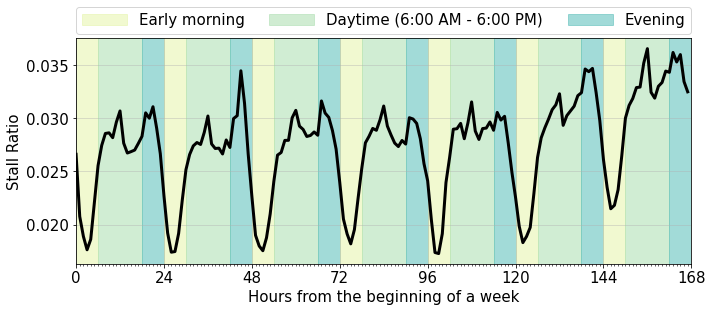

In [5]:
colors = ['#1f77b4', '#ff7f0e']
fig, ax0 = plt.subplots(1, 1, figsize = (10, 4))

ll = 24*7

stall_mean_m = a.values.reshape(-1)[:ll]
stall_mean_s = b.values.reshape(-1)[:ll]
ax0.plot(np.arange(len(stall_mean_m)), stall_mean_m, color='#000000', linewidth=3)
# ax0.fill_between(np.arange(len(stall_mean_m)), stall_mean_m+stall_mean_s, stall_mean_m-stall_mean_s, alpha=.5, linewidth=0,color='#000000')
# https://stackoverflow.com/questions/24943991/change-grid-interval-and-specify-tick-labels-in-matplotlib
major_ticks = np.arange(0, ll+1, 24)
minor_ticks = np.arange(0, ll+1, 1)
ax0.set_xticks(major_ticks)
ax0.set_xticks(minor_ticks, minor=True)
# ax1.tick_params(axis='y', labelcolor=colors[1], labelsize=15)

# https://www.practicalpythonfordatascience.com/ap_seaborn_palette
ccp = sns.color_palette('YlGnBu')
# ccp = sns.color_palette('YlOrBr')
alpha_rate = 0.6
for i in range(7):
    ax0.axvspan(0+24*i, 6+24*i, color=ccp[0], alpha=alpha_rate, label='Early morning')
    ax0.axvspan(6+24*i, 18+24*i, color=ccp[1], alpha=alpha_rate, label='Daytime (6:00 AM - 6:00 PM)')
    ax0.axvspan(18+24*i,24+24*i, color=ccp[2], alpha=alpha_rate, label='Evening')

ax0.set_xlim([0, ll])
ax0.grid(alpha=0.5)
# ax0.set_xlim(left=0,right=168)
# ax0.tick_params(axis='y', labelcolor='tab:blue')
ax0.tick_params(axis='both', which='major', labelsize=15)
# ax0.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
# ax0.set_xscale('log')
ax0.set_xlabel('Hours from the beginning of a week' , fontsize=15)
ax0.set_ylabel('Stall Ratio', fontsize=15)
# ax1.set_ylabel('Reset Ratio', color=colors[1],fontsize=15)
# ax1.tick_params(axis='x', rotation=55)
# ax0.legend(fontsize=15)
fig.tight_layout()
# fig.savefig('./stall_ratio_temporal_1.pdf')

handles, labels = ax0.get_legend_handles_labels()
s = fig.subplotpars
wid = s.right-s.left
bb=[s.left, s.top+0.06, wid, 0.05]
leg = fig.legend(handles[:3], labels[:3], bbox_to_anchor=bb, mode="expand", borderaxespad=0, bbox_transform=fig.transFigure, 
                 handlelength=3, ncol=4, fontsize=15)
# fig.savefig('./stall_ratio_temporal_2.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')